# STOR 566, Homework 1
### Instructor: Yao Li
### Keywords: optimization
### Due date: Sep 04, 11:55pm
### **Submission Instruction**

- Please download this script and use it to answer the questions in the homework. 
- For submission, please include your code, code output and answers in the script and submit the ipynb file on sakai.
- Please don't modify existing cells. But you can add cells between the exercise statements.
- To make markdown, please switch the cell type to markdown (from code) - you can hit 'm' when you are in command mode - and use the markdown language. For a brief tutorial see: https://daringfireball.net/projects/markdown/syntax


In [ ]:
import os
import time
import numpy as np
from tqdm import tqdm
import torch
import torch.nn as nn
import torch.optim as optim

In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


## Problem 1 (10 points)

Prove whether the following functions are convex or not.
- (a) (5 points) $f(x_1,x_2)=(x_1x_2-1)^2$, where $x_1, x_2\in \mathbb{R}$.
- (b) (5 points) $f(\mathbf{w}_1, \mathbf{w}_2)=\|\mathbf{w}_1-\mathbf{w}_2\|^2_2$,  where $\mathbf{w}_1, \mathbf{w}_2\in \mathbb{R}^2$.


## Solution of Problem 1 (a):<br />
$\frac{df}{fx_1} = 2x_1{x_2}^2 - 2x_2$ <br />
$\frac{df^{''}}{fx_1} = 2{x_2}^2$ <br />
So, f(x1, x2) is twice differentiable. <br />
The Hessian matrix is $A = \begin{bmatrix} 2{x_2}^2 & 4x_1x_2 - 2 \\ 4x_1x_2 - 2 & 2{x_1}^2 \end{bmatrix}$

Then, for any vector $n, An = \begin{bmatrix} 2{x_2}^2n_1 + 4x_1x_2n_2-2n_2\\2{x_1}^2n_2+4x_1x_2n_1-2n_1 \end{bmatrix}$

Then, $<An,A> = 4{x_2}^2{n_1}^2 + 8x_1x_2n_1n_2-4n_1n_2$, which is not always greater than or equal to 0.

This Hessian matrix is not positive semidefinite.
Thus, this function is not convex.

## Answer: 
This function is not convex.

##Solution of Problem 1 (b):

Since $w_1, w_2 \in R^2, w1-w2 \in R^2$.

Let $w_1-w_2 = \begin{bmatrix} m1 \\ m2 \end{bmatrix}$ for $m_1,m_2 \in R$.

Then, $\|w_1-w_2\|_2^2 = {m_1}^2 + {m_2}^2$.

So, the question is equivalent to determine whether $f(m_1,m_2) = {m_1}^2 + {m_2}^2$ ( $m_1,m_2 \in R$ ) is convex.

The Hessian matrix is $A = \begin{bmatrix} 2 & 0 \\ 0 & 2 \end{bmatrix}$

Then, for any vector $n, An = \begin{bmatrix} 2n_1\\2n_2 \end{bmatrix}$

Then, $<An,A> = 2{n_1}^2+2{n_2}^2$, which is always greater than or equal to 0.

This Hessian matrix is positive semidefinite.
Thus, this function is convex.

##Answer:

This function is Convex.

## Problem 2 (10 points)

Identify stationary points for $f(x) = 2x_1 +12x_2 +x^2_1 -3x^2_2$? Are they local minimum/maximum; global minimum/maximum or saddle points? Why?

## Answer:

$\frac{df}{dx_1} = 2 + 2x_1$

$\frac{df}{dx_2} = 12 - 6x_2$

Let $\frac{df}{dx_1} = \frac{df}{dx_2} = 0$, then $x_1 = -1, x_2 = 2$.

$D = \frac{d^2f}{d{x_1}^2} * \frac{d^2f}{d{x_2}^2} - (\frac{d^2f}{d{x_1}d{x_2}})^2 = -12$

So, $D < 0$ for all $x_1, x_2$.

Thus, there is only one stationary point (-1, 2), and it is a saddle point.



## Problem 3 (80 points)

Given training data $\{\mathbf{x}_i, y_i\}^n_{i=1}$, each $x_i\in \mathbb{R}^d$ and $y_i \in \{+1, -1\}$, we try to solve the following logistic regression problem by gradient descent:
\begin{align}
\min_{\mathbf{w}\in R^d}\left\{\frac{1}{n}\sum_{i=1}^n\log(1+e^{-y_i\mathbf{w}^T\mathbf{x}_i})+\frac{1}{2}\|\mathbf{w}\|^2_2  \right\} := f(\mathbf{w}).
\end{align}
Test the algorithm using the 'heart scale' dataset with $n = 270$ and $d = 13$: the matrix $\mathbf{X}$ is stored in the file 'X$\_$heart', and the vector $\mathbf{y}$ is stored in the file 'y$\_$heart'. ('X$\_$heart' contains $n$ lines, each line stores a vector $\mathbf{x}_i$ with $d$ real numbers. 'y$\_$heart' contains the $\mathbf{y}$ vector.)

In [ ]:
import pandas as pd
import math
import matplotlib.pyplot as plt

In [ ]:
## Please implement data loading yourself

X_train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/X_heart", header = None)
Y_train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/y_heart", header = None)

X_train.columns = ['col']
X_train = X_train.col.str.extract('([^a-zA-Z]+ )([^a-zA-Z]+ )([^a-zA-Z]+ )([^a-zA-Z]+ )([^a-zA-Z]+ )([^a-zA-Z]+ )([^a-zA-Z]+ )([^a-zA-Z]+ )([^a-zA-Z]+ )([^a-zA-Z]+ )([^a-zA-Z]+ )([^a-zA-Z]+ )([^a-zA-Z]+)', expand=True)
X_train = X_train.apply(pd.to_numeric)

X_train = X_train.to_numpy()
Y_train = Y_train.to_numpy()

### (a) (5 points) Compute the gradient of $f(\mathbf{w})$ w.r.t. $\mathbf{w}$.

##Answer: 

Gradient of f(w) w.r.t. w = $\frac{1}{n}\sum_{i=1}^n\frac{-\mathbf{y}_i\mathbf{x}_i}{1 + \mathbf{e}^{\mathbf{y}_i\mathbf{w}^T\mathbf{x}_i} } + \mathbf{w}$

### (b) (30 points) Implement the gradient descent algorithm with a fixed step size $\eta$. Find a small $\eta_1$ such that the algorithm converges. Increase the step size to $\eta_2$ so the algorithm cannot converge. Run 50 iterations and plot the iteration versus $\log(f(\mathbf{x}^k) -f(\mathbf{x}^*))$ plot for $\eta_1$ and $\eta_2$. In practice it is impossible to get the exact optimal solution $\mathbf{x}^*$, so use the minimum value you computed as $f(\mathbf{x}^*)$ when you plot the figure. Report the $f(\mathbf{x}^*)$ value you used for generating the plots.

In [ ]:
pip install BertEmbeddings

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement BertEmbeddings (from versions: none)
ERROR: No matching distribution found for BertEmbeddings


In [ ]:
## Implementation of GD
## You can insert more code chunks and text cells between (b) and (c) if you want to.
## Your code:

In [ ]:
def get_gradient(X, Y, w):
  length = len(X[0])
  gradient = np.zeros(length).reshape(length, 1)
  for i in range (len(X)):
    gradient = gradient + -1 * Y[i] * X[i].reshape(length,1) / (1 + math.exp(Y[i] * np.transpose(w) @ X[i].reshape(length,1)))
  return gradient/len(X)

In [ ]:
def get_twomod(w):
  mod = 0
  for i in range (len(w)):
    mod = mod + w[i]*w[i]
  return mod / 2

In [ ]:
def get_loss(X, Y, w):
  length = len(X[0])
  loss = 0
  for i in range (len(X)):
    loss = loss + math.log(1 + math.exp(-1 * Y[i] * np.transpose(w) @ X[i].reshape(length,1)))
  return loss / len(X) + get_twomod(w)

##Plot of a small step size $\eta_1$: 0.015

In [ ]:
alpha1 = 0.015
w = np.zeros(len(X_train[0])).reshape(len(X_train[0]), 1)
data_alpha1 = np.zeros(50)

for i in range (50):
  data_alpha1[i] = get_loss(X_train, Y_train, w)
  w = w - alpha1 * get_gradient(X_train, Y_train, w)

min_num = min(data_alpha1)
data_alpha1 = data_alpha1 - min_num
data_alpha1 = np.log(data_alpha1)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()


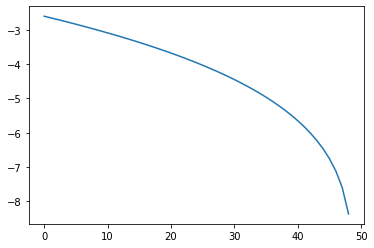

In [ ]:
plt.plot(np.arange(50), data_alpha1)

##Plot of a small step size $\eta_2$: 0.03

In [ ]:
alpha2 = 0.03
w2 = np.zeros(len(X_train[0])).reshape(len(X_train[0]), 1)
data_alpha2 = np.zeros(50)

for i in range (50):
  data_alpha2[i] = get_loss(X_train, Y_train, w2)
  w2 = w2 - alpha2 * get_gradient(X_train, Y_train, w2)

min_num = min(data_alpha2)
data_alpha2 = data_alpha2 - min_num
data_alpha2 = np.log(data_alpha2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()


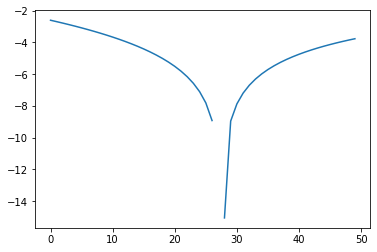

In [ ]:
plt.plot(np.arange(50), data_alpha2)

#The $f(\mathbf{x}^*)$ value used is: 0.6187217660340529

In [ ]:
print(min_num)

0.6187217660340529


### (c) (5 points) Write down the pseudo code of gradient descent with backtracking line search ($\sigma=0.01$).

Pseudo code:

Initialize the weights w0 <br />
  &emsp; For t = 1, 2, · · ·, 50<br />
    &emsp; &emsp; Compute the gradient d = −∇f (w) <br />
    &emsp; &emsp; For α = α0, α0/2, α0/4, · · ·<br />
      &emsp; &emsp; &emsp; Break if f (w + αd) ≤ f (w) + σα∇f (w)^Td <br />
    &emsp; &emsp; Update w ← w + αd<br />
&emsp;Return the final solution w

w.r.t. ∇f (w) = $\frac{1}{n}\sum_{i=1}^n\frac{-\mathbf{y}_i\mathbf{x}_i}{1 + \mathbf{e}^{\mathbf{y}_i\mathbf{w}^T\mathbf{x}_i} } + \mathbf{w}$

### (d) (20 points) Implement the gradient descent algorithm with backtracking line search ($\sigma=0.01$). Plot the same iteration versus $\log(f(\mathbf{x}^k) -f(\mathbf{x}^*))$ plot.

In [ ]:
## Implementation of GD with line search
## You can insert more code chunks and text cells between (d) and (e) if you want to.
## Your code:

In [ ]:
def condition(X, Y, w, alpha, d, sigma):
  if (get_loss(X, Y, w + alpha * d) <= get_loss(X, Y, w) + sigma * alpha * np.transpose(get_gradient(X, Y, w)) @ d):
    return True
  else:
    return False

In [ ]:
def line_search(X, Y, arr):
  # print('# of data: ', len(X))
  w3 = np.zeros(len(X[0])).reshape(len(X[0]), 1)
  for i in range (50):
    if (i % 5 == 0):
      print('Now executing iteration ', i)
    # print('Now iterating of 50 iterations', i)
    arr[i] = get_loss(X, Y, w3)
    d = -1 * get_gradient(X, Y, w3)
    alpha = 0.3
    sigma = 0.01
    while (not condition(X, Y, w3, alpha, d, sigma)):
      alpha = alpha / 2

    # print('Alpha found: \n', alpha)
    w3 = w3 + alpha * d
  
  return w3

In [ ]:
arr = np.zeros(50)
final_w = line_search(X_train, Y_train, arr)

Now executing iteration  0
Now executing iteration  5
Now executing iteration  10
Now executing iteration  15
Now executing iteration  20
Now executing iteration  25
Now executing iteration  30
Now executing iteration  35
Now executing iteration  40
Now executing iteration  45


##The Plot:

In [ ]:
min_arr = min(arr)
arr = arr - min_arr
arr = np.log(arr)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


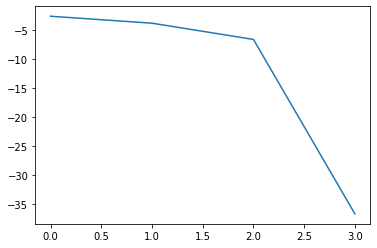

In [ ]:
plt.plot(arr)

### (e) (20 points) Test your implementation (gradient descent with backtracking line search) on a larger dataset 'epsilonsubset'. Plot the same iteration vs error plot.

In [ ]:
## Implementation of GD with line search
## You can insert more code chunks and text cells between (d) and (e) if you want to.
## Your code:

In [ ]:
X_epsilon = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/x_epsilonsubset", header = None)
Y_epsilon = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/y_epsilonsubset", header = None)

In [ ]:
size = len(X_epsilon.iloc[0][0].split())
X_temp = np.zeros((len(X_epsilon), size))

for i in range (len(X_epsilon)):
  X_temp[i] = X_epsilon.iloc[0][0].split()

In [ ]:
X_epsilon = X_temp
Y_epsilon = Y_epsilon.to_numpy()

In [ ]:
arr_epsilon = np.zeros(50)
final_w_epsilon = line_search(X_epsilon, Y_epsilon, arr_epsilon)

Now executing iteration  0
Now executing iteration  5
Now executing iteration  10
Now executing iteration  15
Now executing iteration  20


##The Plot:

In [ ]:
min_epsilon = min(arr_epsilon)
arr_epsilon = arr_epsilon - min_epsilon
arr_epsilon = np.log(arr_epsilon)

NameError: ignored

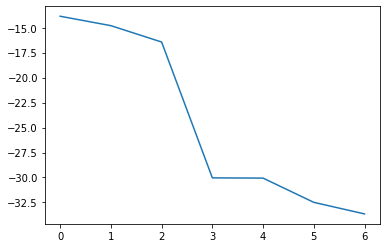

In [ ]:
plt.plot(np.arange(50), arr_epsilon)